In [30]:
import cv2
import numpy as np
import matplotlib as plt
%matplotlib inline

In [33]:
img = cv2.imread('Images/scanlight.jpg')
# img = cv2.imread(r'C:\Users\kyle\Pictures\Camera Roll\WIN_20210228_12_57_17_Pro.jpg')
rows,cols,ch = img.shape
print(img.shape)

(1200, 1600, 3)


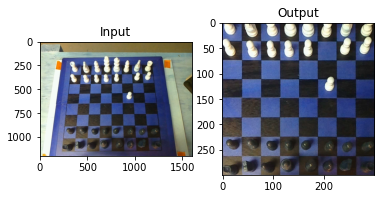

In [34]:
pts1 = np.float32([[327,265],[1173,249],[227,1150],[1273,1140]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.pyplot.subplot(121),plt.pyplot.imshow(img),plt.pyplot.title('Input')
plt.pyplot.subplot(122),plt.pyplot.imshow(dst),plt.pyplot.title('Output')
plt.pyplot.show()

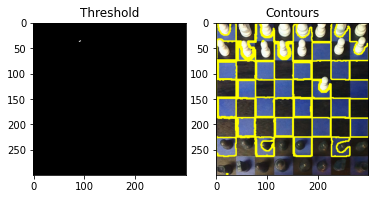

In [51]:
lower = [15, 20, 70]
upper = [25, 40, 80]

lower = [int(lower[0]*255/360),int(lower[1]*255/100),int(lower[2]*255/100)]
upper = [int(upper[0]*255/360),int(upper[1]*255/100),int(upper[2]*255/100)]

hsvim = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)
lower = np.array(lower, dtype = "uint8")
upper = np.array(upper, dtype = "uint8")

skinRegionHSV = cv2.inRange(hsvim, lower, upper)
blurred = cv2.blur(skinRegionHSV, (2,2))
ret,thresh = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY)

newImg = dst
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = max(contours, key=lambda x: cv2.contourArea(x))
cv2.drawContours(newImg, [contours], -1, (255,255,0), 2)

plt.pyplot.subplot(121),plt.pyplot.imshow(thresh,'gray'),plt.pyplot.title('Threshold')
plt.pyplot.subplot(122),plt.pyplot.imshow(newImg),plt.pyplot.title('Contours')
plt.pyplot.show()

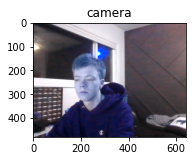

In [52]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()

plt.pyplot.subplot(121),plt.pyplot.imshow(frame),plt.pyplot.title('camera')
plt.pyplot.show()

(<AxesSubplot:title={'center':'camera'}>,
 Text(0.5, 1.0, 'camera'))

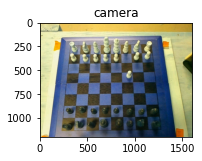

In [2]:
import cv2
import numpy as np
import matplotlib as plt
%matplotlib inline
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1600)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1200)
ret, frame = cap.read()
plt.pyplot.subplot(121),plt.pyplot.imshow(frame),plt.pyplot.title('camera')

TypeError: Image data of dtype object cannot be converted to float

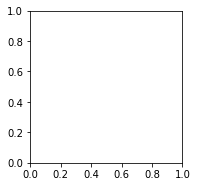

In [6]:
import cv2
import numpy as np
import matplotlib as plt
%matplotlib inline

# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(1, cv2.CAP_DSHOW)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1600)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1200)
ret, frame = cap.read()
plt.pyplot.subplot(121),plt.pyplot.imshow(frame),plt.pyplot.title('camera')

